In [1]:
from utils import SurrogatPyRepEnvironment
from basic_walk.utils import BaseAgent
import sys
import time


import pickle
import matplotlib.pyplot as plt
import numpy as np

# Base Agent

## Ходьба

In [2]:
info_log = []

with SurrogatPyRepEnvironment('scenes/basic_scene.ttt', headless_mode=False, foot_only_mode=True) as env:
    for i in range(1):
        agent = BaseAgent(random_mode=True, foot_only_mode=True)
        
        state = env.reset()
        for _ in range(300):
            action = agent.act(state)
            state, r, done, info = env.step(action)
            info_log.append(info)
            if done:
                print("Fuck")
                break

Fuck


## Анализ

In [3]:
def plot_info_param(info_log, param_name):
    param = []
    for info in info_log:
        param.append(info[param_name])
    
    plt.plot(param, label=param_name)
    plt.legend()
    plt.show()

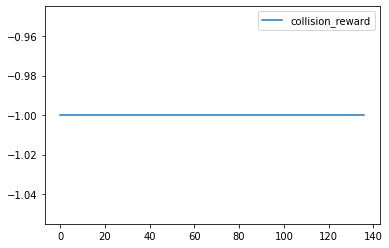

In [5]:
plot_info_param(info_log, 'collision_reward')